In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from matplotlib import pyplot as plt

c:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_dataset = np.loadtxt("train_regression_dataset.csv", delimiter=',')
test_dataset = np.loadtxt("test_regression_dataset.csv", delimiter=',')

In [3]:
features_count = 4
X_train = train_dataset[:, :features_count]
y_train = train_dataset[:, features_count:]
X_test = test_dataset[:, :features_count]
y_test = test_dataset[:, features_count:]

In [4]:
def plot_history(history, metrics=['loss']):
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
        plt.ylabel(metric)
        plt.xlabel('epoch')
        plt.show()

### Linear Model

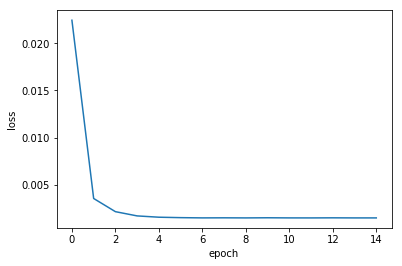

11900/11900 [==============================] - 0s 30us/step
Train Loss: 0.0016
Test Loss: 0.0015


In [5]:
model = Sequential()
model.add(Dense(2, activation='linear', input_dim=4))

model.compile(SGD(lr=0.5), 'mean_squared_error')

history = model.fit(X_train, y_train, epochs=15, verbose=0)

plot_history(history, ['loss'])

train_loss = model.evaluate(X_test, y_test)
test_loss = model.evaluate(X_train, y_train)

print("Train Loss: %.4f" % train_loss)
print("Test Loss: %.4f" % test_loss)

### With recommendation from EasyNN

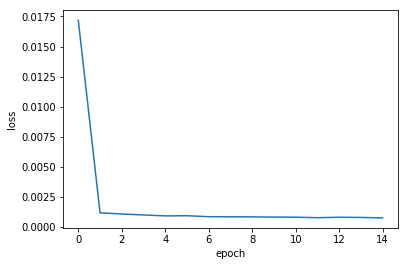

11900/11900 [==============================] - 0s 32us/step
Train Loss: 0.0007
Test Loss: 0.0006


In [6]:
model = Sequential()
model.add(Dense(6, activation='sigmoid', input_dim=4))
model.add(Dense(2, activation='linear'))

model.compile(SGD(lr=0.7, decay=1e-6, momentum=0.8), 'mean_squared_error')

history = model.fit(X_train, y_train, epochs=15, verbose=0)

plot_history(history, ['loss'])

train_loss = model.evaluate(X_test, y_test)
test_loss = model.evaluate(X_train, y_train)

print("Train Loss: %.4f" % train_loss)
print("Test Loss: %.4f" % test_loss)